In [107]:
import pandas as pd
import numpy as np
import os

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore') 


### 시리즈 생성

In [108]:
s = pd.Series([9904312, 3448737, 289045, 2466052], index = ["서울", "부산", "인천", "대구"])
s


서울    9904312
부산    3448737
인천     289045
대구    2466052
dtype: int64

In [109]:
pd.Series(range(10, 14))

0    10
1    11
2    12
3    13
dtype: int64

### 데이터프레임 생성

In [110]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index= index, columns = columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상,2466052,2431774,2456016,2473990,0.0141


### 2. ndrray

In [111]:
import numpy as np
x = np.array([[1,2,3], [3,4,6]])
np.size(x)

6

In [112]:
np.size(x,1)

3

In [113]:
np.std(x)

1.5723301886761005

In [114]:
x= [1,2,3,4]
y = np.array(x, dtype = float)
y

array([1., 2., 3., 4.])

In [115]:
#pip install numpy_financial

In [116]:
import numpy_financial as npf
# 현금흐름 데이터
cashflows = [-100, 50, 40, 30, 20]

x = npf.npv(0.1, cashflows)
print(round(x,2))

14.71


In [117]:
payment = npf.pmt(0.045/12, 30*12, 250000)

a= round(payment,2)
print(a)

-1266.71


#### npf.pv

 - pv 함수는 현재가치(Present Value, PV)를 계산하는 데 사용되며 이 함수는 특정 이자율에 따라 미래 현금흐름을 현재 가치로 할인하며 엑셀에서의 PV와 비슷한 역할을 함

- 사용 방식은 npf.pv(rate, nper, pmt, fv = 0.0, when = 'end')이며 각 옵션은
- rate: 이자율
- nper: 총 기간(년)
- pmt: 각 기간에 지불되는 현금 흐름
- fv : 미래 가치(Future Value). 기본값은 0입니다.
- when (선택 사항): 지불이 발생하는 기간의 시작 또는 끝을 나타내는 플래그. 0이면 기간의 끝에 지불이 발생하고, 1이면 기간의 시작에 지불이 발생 기본값은 0

In [118]:
import numpy_financial as npf

pv1 = npf.pv(0.1, 5, 0, 100)
print(round(pv1,2))

-62.09


### Scipy

In [119]:
import scipy as sp

ret = sp.array([0.1, 0.05, -0.02])
print(sp.mean(ret))
print(pow(sp.prod(ret+1), 1./len(ret))-1)

0.04333333333333334
0.04216388706767926


In [120]:
ret

array([ 0.1 ,  0.05, -0.02])

In [121]:
def geomeanreturn(ret):
    
    return pow(sp.prod(ret+1), 1./len(ret))-1

print(geomeanreturn(ret))

0.04216388706767926


In [122]:
import scipy as sp

print(sp.unique([2,3,4,6,6,4,4]))
print(sp.median([1,2,3,4,5]))

[2 3 4 6]
3.0


####  (4) Matplotlib

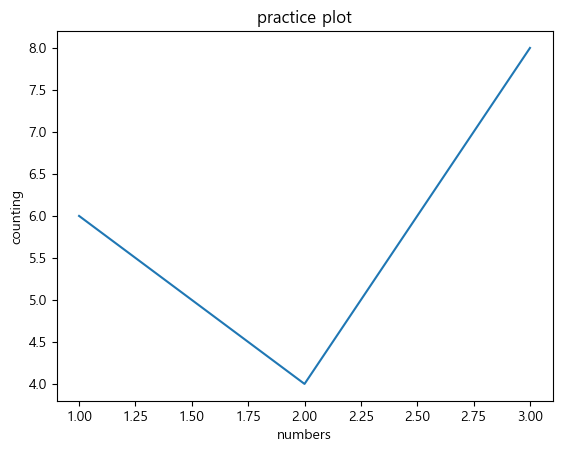

In [123]:
import matplotlib.pyplot as plt

x = [1,2,3]

y =[6,4,8]

plt.plot(x,y)
plt.xlabel('numbers')
plt.ylabel('counting')
plt.title('practice plot')
plt.show()

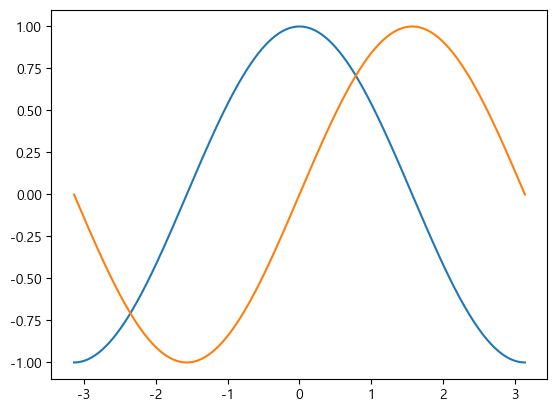

In [124]:
from matplotlib.pyplot import *

x = np.linspace(-np.pi, np.pi, 256, endpoint= True)

c, s = np.cos(x), np.sin(x)

plot(x,c), plot(x,s)
show()

In [125]:
# pip install statsmodels

In [126]:
import statsmodels.api as sm

In [127]:
import numpy as np
import pandas as pd

x = pd.Series([1,4,-3,np.nan,5])
print(x)

0    1.0
1    4.0
2   -3.0
3    NaN
4    5.0
dtype: float64


In [128]:
m = np.mean(x)
print(m)
print(x.fillna(m))

1.75
0    1.00
1    4.00
2   -3.00
3    1.75
4    5.00
dtype: float64


In [129]:
import pandas as pd
import numpy as np

np.random.seed(1256)

df = pd.DataFrame(np.random.rand(4, 2), columns = ['stock A', 'stock B'])
df2 = df.stack()

print('원시 데이터셋')
print(df)

원시 데이터셋
    stock A   stock B
0  0.972842  0.277234
1  0.997334  0.053537
2  0.152902  0.676041
3  0.789125  0.149379


In [130]:
df2 = df.stack()
print("스택된 데이터셋")
print(df2)

스택된 데이터셋
0  stock A    0.972842
   stock B    0.277234
1  stock A    0.997334
   stock B    0.053537
2  stock A    0.152902
   stock B    0.676041
3  stock A    0.789125
   stock B    0.149379
dtype: float64


In [131]:
k = df2.unstack()
print("복귀")
print(k)

복귀
    stock A   stock B
0  0.972842  0.277234
1  0.997334  0.053537
2  0.152902  0.676041
3  0.789125  0.149379


In [132]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [133]:
sm_10 = fdr.DataReader("005930","2013-01-01","2022-12-31")
sm_10

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-01-02,30660,31519,30540,31520,229274,0.035480
2013-01-03,31640,31680,30860,30860,284927,-0.020939
2013-01-04,30800,30840,30199,30500,260120,-0.011666
2013-01-07,30300,30560,29999,30400,252436,-0.003279
2013-01-08,30260,30340,29960,30000,276757,-0.013158
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


<Axes: xlabel='Date'>

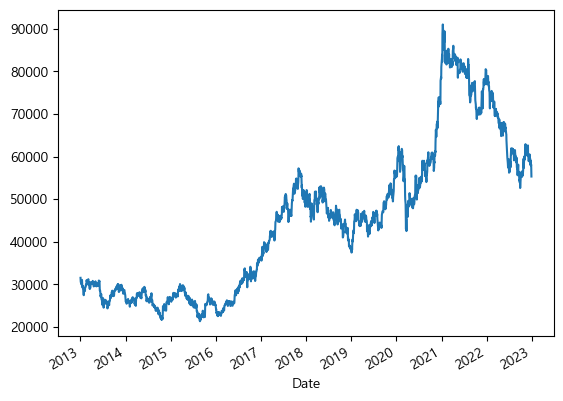

In [134]:
sm_10["Close"].plot()

In [135]:
naver_10 = fdr.DataReader("035420","2013-01-01","2022-12-31")
naver_10

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2013-01-02,72354,72982,71256,71413,154535,0.002203
2013-01-03,71881,72823,68743,69372,356250,-0.028580
2013-01-04,69529,71099,69215,71099,234701,0.024895
2013-01-07,72039,75492,71882,75336,404906,0.059593
2013-01-08,75336,75807,74081,74395,198565,-0.012491
...,...,...,...,...,...,...
2022-12-23,180500,182000,178000,178000,613209,-0.035230
2022-12-26,178500,180500,177000,178500,350843,0.002809
2022-12-27,179500,182500,179000,181000,492232,0.014006


<Axes: xlabel='Date'>

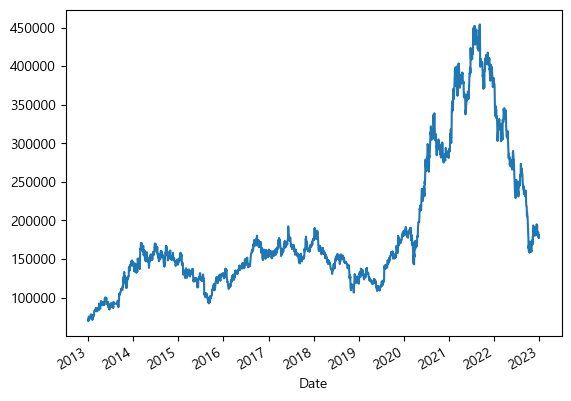

In [136]:
naver_10["Close"].plot()

In [137]:
sm = fdr.DataReader("005930")
lg = fdr.DataReader("066570")

In [138]:
print(sm["Close"][-5:])
print(lg["Close"][-5:])

Date
2024-01-12    73100
2024-01-15    73900
2024-01-16    72600
2024-01-17    71000
2024-01-18    71700
Name: Close, dtype: int64
Date
2024-01-12    94700
2024-01-15    95100
2024-01-16    94600
2024-01-17    91300
2024-01-18    91200
Name: Close, dtype: int64


In [139]:
print(sm["Close"][-5:].pct_change())
print(lg["Close"][-5:].pct_change())

Date
2024-01-12         NaN
2024-01-15    0.010944
2024-01-16   -0.017591
2024-01-17   -0.022039
2024-01-18    0.009859
Name: Close, dtype: float64
Date
2024-01-12         NaN
2024-01-15    0.004224
2024-01-16   -0.005258
2024-01-17   -0.034884
2024-01-18   -0.001095
Name: Close, dtype: float64


In [140]:
sk = fdr.DataReader("006660","2022-01-01","2022-12-31")
sm = fdr.DataReader("005930","2022-01-01","2022-12-31")

In [141]:
sm

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


In [142]:
sk

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,16350,16450,15700,16300,52420,-0.029762
2022-01-04,16300,16500,15950,16150,84033,-0.009202
2022-01-05,16100,16250,15750,16100,38978,-0.003096
2022-01-06,15750,16000,15550,15550,53804,-0.034161
2022-01-07,15500,15800,15150,15600,28708,0.003215
...,...,...,...,...,...,...
2022-12-23,9820,9930,9820,9880,10209,-0.012000
2022-12-26,9930,9930,9610,9630,11255,-0.025304
2022-12-27,9700,9780,9600,9650,4372,0.002077


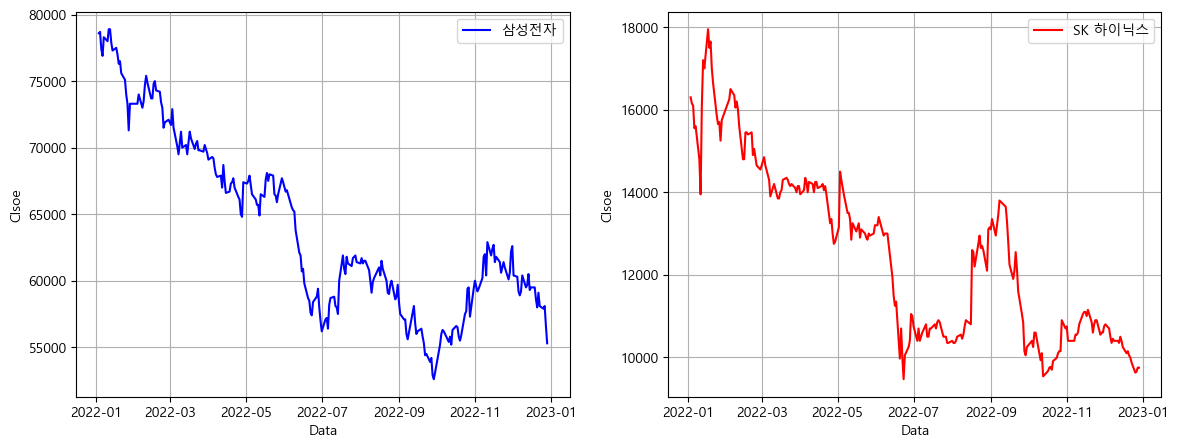

In [143]:
fig = plt.figure(figsize = (14, 5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(sm["Close"], color='b', label='삼성전자')
ax2.plot(sk["Close"],color = 'r', label='SK 하이닉스')

ax1.legend(loc = 'best')
ax2.legend(loc = 'best')

ax1.grid(True)
ax2.grid(True)

ax1.set_xlabel('Data')
ax2.set_xlabel('Data')

ax1.set_ylabel('Clsoe')
ax2.set_ylabel('Clsoe')

plt.show()

In [144]:
sm.describe()

,Open,High,Low,Close,Volume,Change
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000
mean,63996.341463,64493.495935,63458.943089,63935.365854,1.448451e+07,-0.001311
std,6709.763434,6618.912172,6623.950152,6625.615818,4.890389e+06,0.014336
min,52300.000000,53600.000000,51800.000000,52600.000000,5.767902e+06,-0.036975
25%,58700.000000,59225.000000,58200.000000,58800.000000,1.103933e+07,-0.010952
50%,61650.000000,62000.000000,61050.000000,61700.000000,1.362839e+07,-0.001744
75%,68800.000000,69225.000000,68575.000000,69000.000000,1.693226e+07,0.006305
max,79500.000000,79800.000000,78600.000000,78900.000000,3.794336e+07,0.044964


In [145]:
sk.describe()

,Open,High,Low,Close,Volume,Change
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000
mean,12475.487805,12770.813008,12224.024390,12461.097561,4.598424e+04,-0.001780
std,2086.688316,2168.394720,2028.053773,2092.822724,1.374757e+05,0.029642
min,9430.000000,9670.000000,9380.000000,9470.000000,1.888000e+03,-0.121586
25%,10550.000000,10800.000000,10350.000000,10512.500000,8.053500e+03,-0.014423
50%,12550.000000,13000.000000,12150.000000,12600.000000,1.338750e+04,0.000000
75%,14087.500000,14250.000000,13900.000000,14100.000000,2.687275e+04,0.009615
max,18250.000000,18600.000000,17400.000000,17950.000000,1.502097e+06,0.166667


In [146]:
# 1. 수익률 구하기와 nan값 처리
sm["Change"] = sm["Close"].pct_change()
sk["Change"] = sm["Close"].pct_change()
sm.dropna(inplace=True)
sk.dropna(inplace=True)

In [147]:
sm

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
2022-01-10,78100,78100,77100,78000,9947422,-0.003831
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


(-10.0, 10.0)

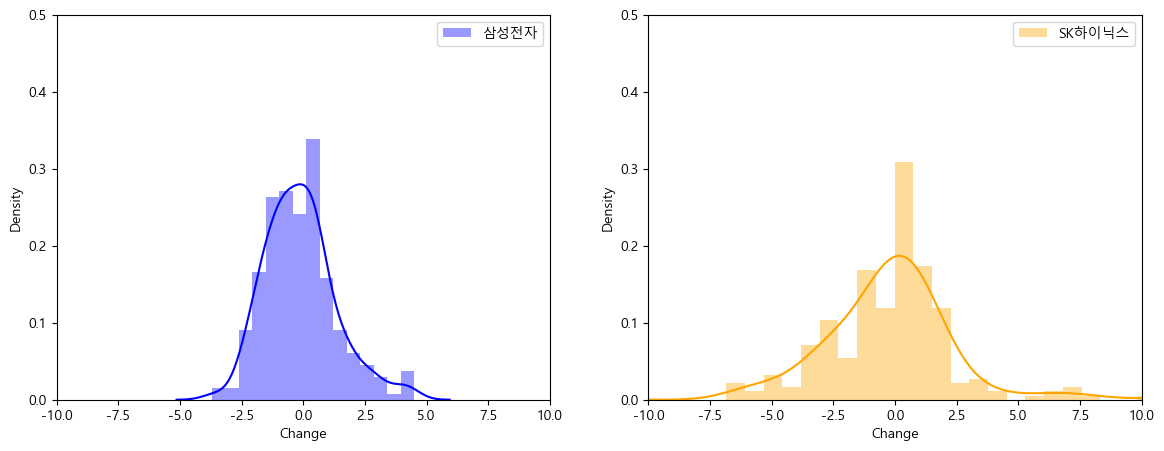

In [151]:
import seaborn as sns

# 1. 수익률 구하기와 nan값 처리
sm["Change"] = sm["Close"].pct_change()*100
sk["Change"] = sk["Close"].pct_change()*100
sm.dropna(inplace=True)
sk.dropna(inplace=True)

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 첫 번째 서브플롯에 displot 그리기
sns.distplot(sm["Change"], kde=True, color='blue', ax=ax1, label='삼성전자')


# 두 번째 서브플롯에 displot 그리기
sns.distplot(sk["Change"], kde=True, color='orange', ax=ax2,label='SK하이닉스')

ax1.legend()
ax2.legend()

ax1.set_ylim(0, 0.5)
ax2.set_ylim(0, 0.5)

ax1.set_xlim(-10, 10)
ax2.set_xlim(-10, 10)



In [152]:
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

In [153]:
print(stats.shapiro(sm["Change"]))
print(stats.shapiro(sk["Change"]))

ShapiroResult(statistic=0.9720407128334045, pvalue=0.00010202786506852135)
ShapiroResult(statistic=0.8753189444541931, pvalue=3.302335618501906e-13)


In [154]:
print(kstest(sm["Change"],'norm'))
print(kstest(sk["Change"],'norm'))

KstestResult(statistic=0.1479960730723126, pvalue=4.134741753809063e-05, statistic_location=-0.6451612903225823, statistic_sign=1)
KstestResult(statistic=0.2002411909541869, pvalue=5.130287134433638e-09, statistic_location=-1.3289036544850474, statistic_sign=1)
